In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from utils import get_formatted_dataset, create_celled_data, plot_roc, plot_density, plot_events
from baselines import baseline

warnings.filterwarnings("ignore")

%matplotlib inline

/Users/ftn/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
DATA_ORIG_PATH = "../data/catalogues/originalCat.csv"
DATA_WITHOUT_AFT_PATH = "../data/catalogues/withoutAftCat.csv"
OUR_ORIG_DF = "../data/prepared_datasets/original_magn_3_5_dataset.csv"
OUR_WITHOUT_AFT_DF = "../data/prepared_datasets/without_aft_magn_3_5_dataset.csv"

# baselines

## with aftershocks

In [3]:
orig_df = pd.read_csv(DATA_ORIG_PATH, sep=" ")
orig_df.head(2)

,YYYY,MM,DD,HH,mm,ssss,LAT,LONG,Depth,Class
0,2004,3,6,18,4,9.0,36.360,136.571,6.2,0.7
1,2004,3,6,18,5,40.0,37.007,138.709,9.8,0.7


In [4]:
len(orig_df), len(orig_df[orig_df["Class"] > 3.5]), len(orig_df[orig_df["Class"] > 6])

(3234319, 35854, 243)

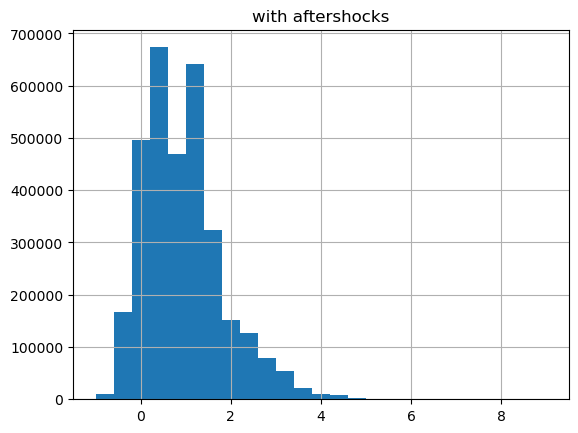

In [5]:
orig_df["Class"].hist(bins=25);
plt.title("with aftershocks");

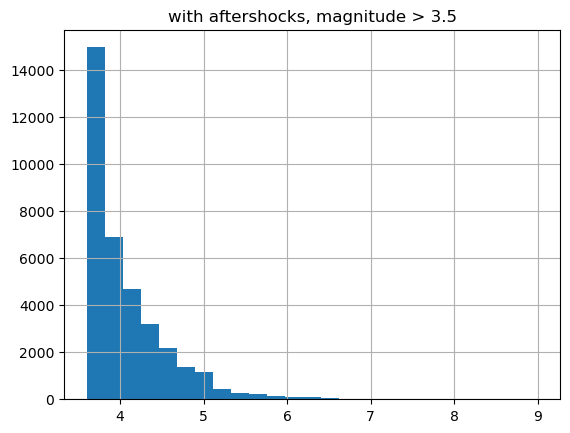

In [6]:
orig_df[orig_df["Class"] > 3.5]["Class"].hist(bins=25);
plt.title("with aftershocks, magnitude > 3.5");

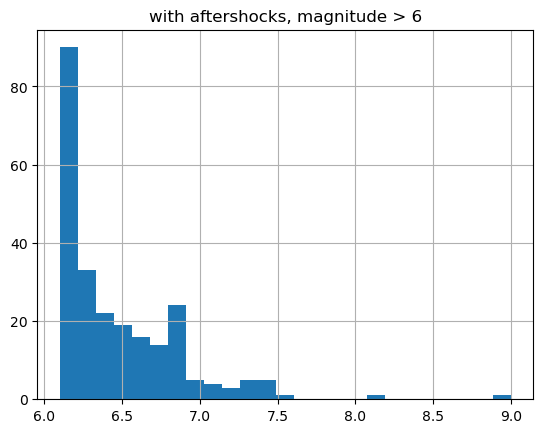

In [7]:
orig_df[orig_df["Class"] > 6]["Class"].hist(bins=25);
plt.title("with aftershocks, magnitude > 6");

### magnitude > 3.5

#### data

In [8]:
formatted_orig_df = get_formatted_dataset(orig_df, min_magnitude=3.5)
formatted_orig_df = formatted_orig_df.rename(columns={"longitude": "lon", "latitude": "lat", "magnitude": "magn"})
formatted_orig_df["time"] = formatted_orig_df["time"].apply(lambda x: x.replace("Z", ""))
formatted_orig_df["time"] = formatted_orig_df["time"].astype("datetime64[ns]")
formatted_orig_df = formatted_orig_df[["time", "lon", "lat", "magn"]]

formatted_orig_df.head()

,time,lon,lat,magn
0,2004-03-07 05:09:36,141.699,38.958,3.9
1,2004-03-07 06:49:53,139.395,35.609,3.8
2,2004-03-07 12:25:42,143.287,36.333,4.1
3,2004-03-08 21:50:38,142.442,41.407,3.6
4,2004-03-09 22:56:37,132.751,33.989,3.6


In [9]:
map_img = plt.imread("../data/jp_map.png")

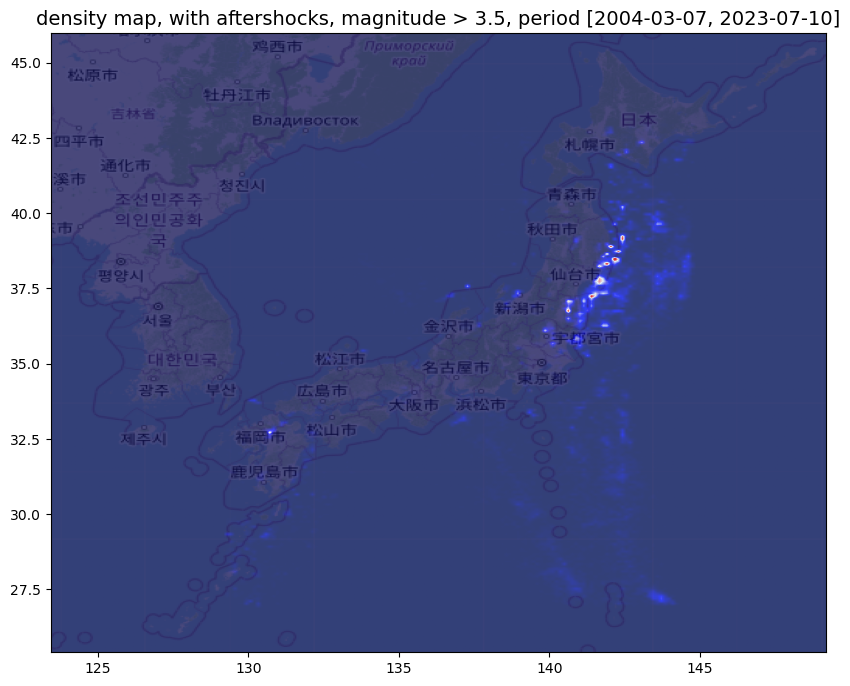

In [10]:
start_dt_str = str(formatted_orig_df["time"].min()).split(" ")[0]
end_dt_str = str(formatted_orig_df["time"].max()).split(" ")[0]
text = f"density map, with aftershocks, magnitude > 3.5, period [{start_dt_str}, {end_dt_str}]"

density_map, x, y = create_celled_data(
    lon=formatted_orig_df["lon"], lat=formatted_orig_df["lat"]
)

plot_density(density_map,)
plt.title(text, fontsize=14);

#### density baseline 10 years

baseline
horizon_min: 10, horizon_max: 50, window_years: 10, testing_days: 1000


100%|██████████| 950/950 [00:29<00:00, 32.06it/s]


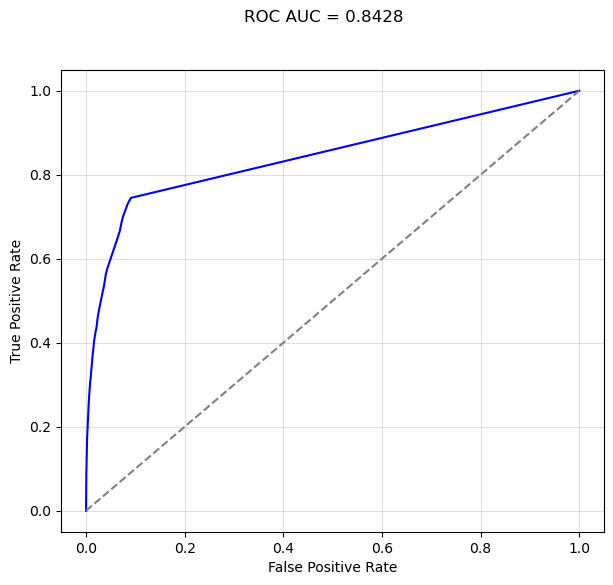

In [11]:
baseline1_orig_magn_3_5 = baseline(
    df=formatted_orig_df,
    window_years=10
)
target, prediction = baseline1_orig_magn_3_5.predict()

plot_roc(
    target=target.flatten(), prediction=prediction.flatten(), 
    src_label="", save_dir=None, file_name=None
);

#### density baseline 5 years

baseline
horizon_min: 10, horizon_max: 50, window_years: 5, testing_days: 1000


100%|██████████| 950/950 [00:26<00:00, 35.93it/s]


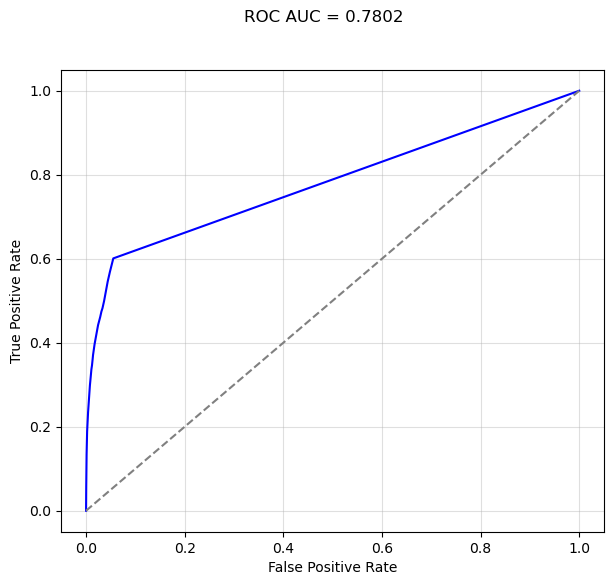

In [12]:
baseline2_org_3_5 = baseline(
    df = formatted_orig_df,
    window_years=5
)
target, prediction = baseline2_org_3_5.predict()

plot_roc(
    target=target.flatten(), prediction=prediction.flatten(), 
    src_label="", save_dir=None, file_name=None
);

### magnitude > 6

#### data

In [13]:
formatted_orig_df = get_formatted_dataset(orig_df, min_magnitude=6.)
formatted_orig_df = formatted_orig_df.rename(columns={"longitude": "lon", "latitude": "lat", "magnitude": "magn"})
formatted_orig_df["time"] = formatted_orig_df["time"].apply(lambda x: x.replace("Z", ""))
formatted_orig_df["time"] = formatted_orig_df["time"].astype("datetime64[ns]")
formatted_orig_df = formatted_orig_df[["time", "lon", "lat", "magn"]]

formatted_orig_df.head(2)

,time,lon,lat,magn
0,2004-05-30 00:56:06,141.859,34.108,6.7
1,2004-09-05 14:07:07,136.798,33.033,7.1


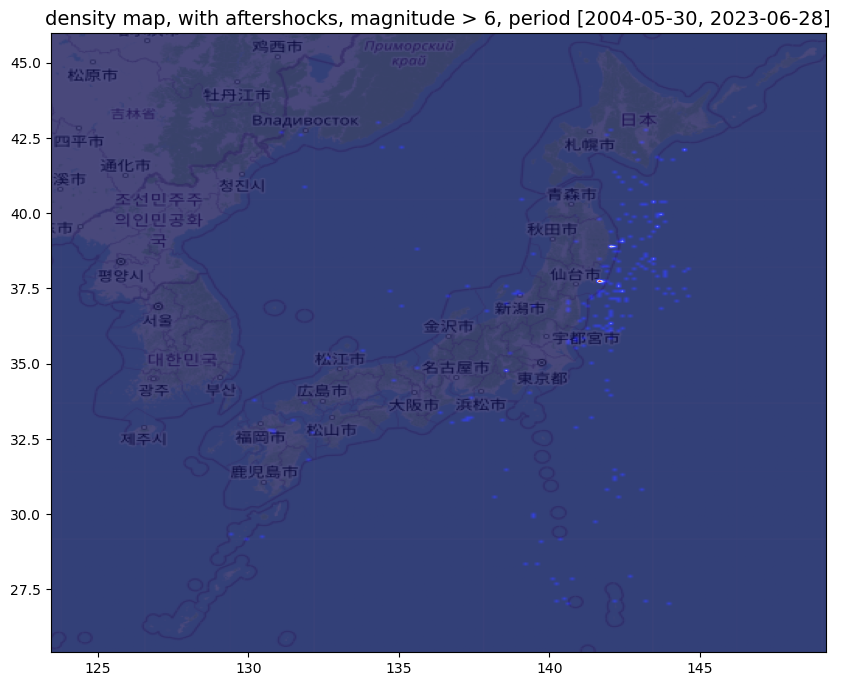

In [14]:
start_dt_str = str(formatted_orig_df["time"].min()).split(" ")[0]
end_dt_str = str(formatted_orig_df["time"].max()).split(" ")[0]
text = f"density map, with aftershocks, magnitude > 6, period [{start_dt_str}, {end_dt_str}]"

density_map, x, y = create_celled_data(
    lon=formatted_orig_df["lon"], lat=formatted_orig_df["lat"]
)

plot_density(density_map,)
plt.title(text, fontsize=14);

#### density baseline 10 years

baseline
horizon_min: 10, horizon_max: 50, window_years: 10, testing_days: 1000


100%|██████████| 950/950 [00:23<00:00, 39.70it/s]


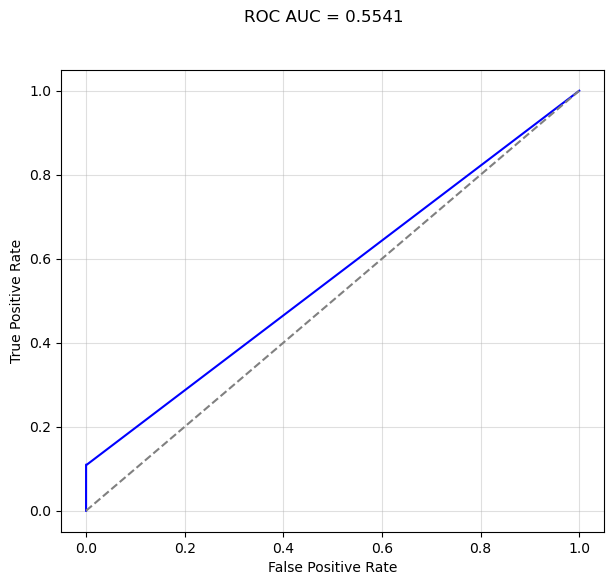

In [15]:
baseline1_orig_magn_6 = baseline(
    df=formatted_orig_df,
    window_years=10
)
target, prediction = baseline1_orig_magn_6.predict()
plot_roc(
    target=target.flatten(), prediction=prediction.flatten(), 
    src_label="", save_dir=None, file_name=None
);

#### density baseline 5 years

baseline
horizon_min: 10, horizon_max: 50, window_years: 5, testing_days: 1000


100%|██████████| 950/950 [00:26<00:00, 36.12it/s]


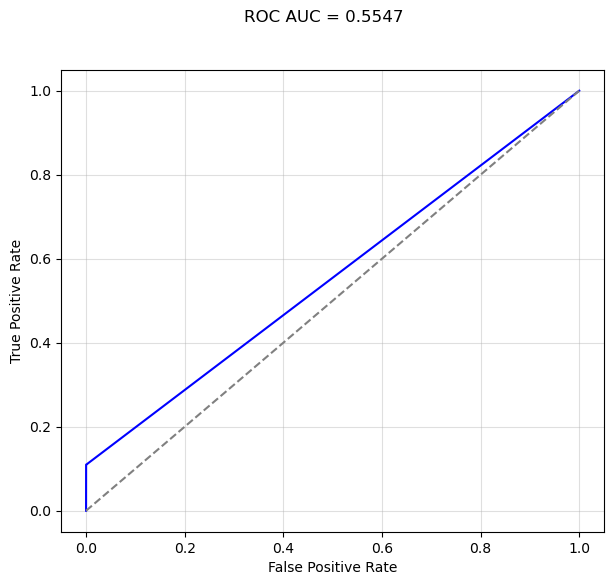

In [16]:
baseline2_org_6 = baseline(
    df = formatted_orig_df,
    window_years=5
)
target, prediction = baseline2_org_6.predict()

plot_roc(
    target=target.flatten(), prediction=prediction.flatten(), 
    src_label="", save_dir=None, file_name=None
);

## without aftershocks

In [17]:
without_aft_df = pd.read_csv(DATA_WITHOUT_AFT_PATH, sep=' ')
without_aft_df.head(2)

,YYYY,MM,DD,HH,mm,ssss,LAT,LONG,Depth,Class
0,2004,3,6,18,4,9.0,36.360,136.571,6.2,0.7
1,2004,3,6,18,5,40.0,37.007,138.709,9.8,0.7


In [18]:
(
    len(without_aft_df), len(without_aft_df[without_aft_df["Class"] > 3.5]), 
    len(without_aft_df[without_aft_df["Class"] > 6])
)

(1273735, 7780, 105)

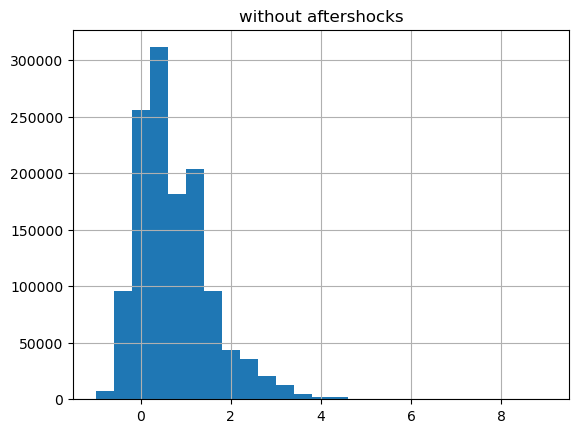

In [19]:
without_aft_df["Class"].hist(bins=25);
plt.title("without aftershocks");

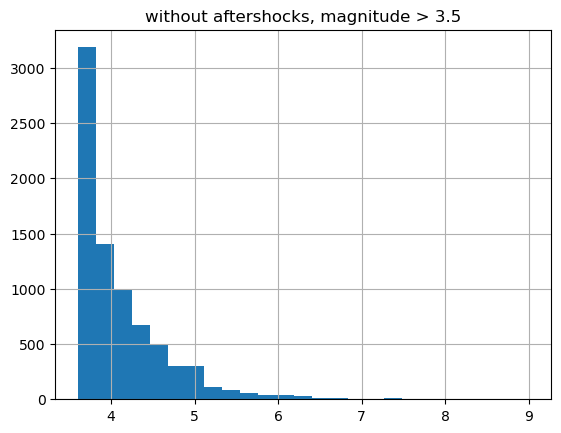

In [20]:
without_aft_df[without_aft_df["Class"] > 3.5]["Class"].hist(bins=25);
plt.title("without aftershocks, magnitude > 3.5");

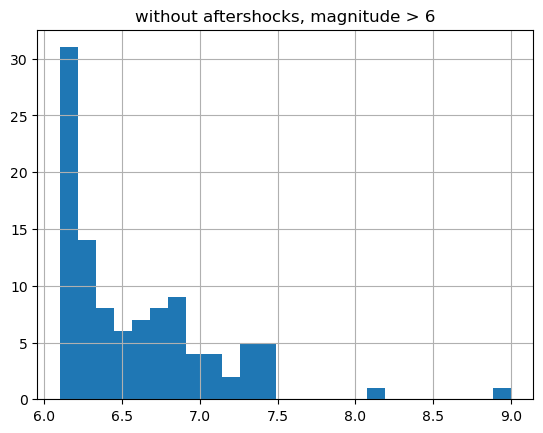

In [21]:
without_aft_df[without_aft_df["Class"] > 6]["Class"].hist(bins=25);
plt.title("without aftershocks, magnitude > 6");

### magnitude > 3.5

#### data

In [22]:
formatted_without_aft_df = get_formatted_dataset(without_aft_df, min_magnitude=3.5)
formatted_without_aft_df = formatted_without_aft_df.rename(columns={"longitude": "lon", "latitude": "lat", "magnitude": "magn"})
formatted_without_aft_df["time"] = formatted_without_aft_df["time"].apply(lambda x: x.replace("Z", ""))
formatted_without_aft_df["time"] = formatted_without_aft_df["time"].astype("datetime64[ns]")
formatted_without_aft_df = formatted_without_aft_df[["time", "lon", "lat", "magn"]]

formatted_without_aft_df.head(2)

,time,lon,lat,magn
0,2004-03-07 05:09:36,141.699,38.958,3.9
1,2004-03-07 06:49:53,139.395,35.609,3.8


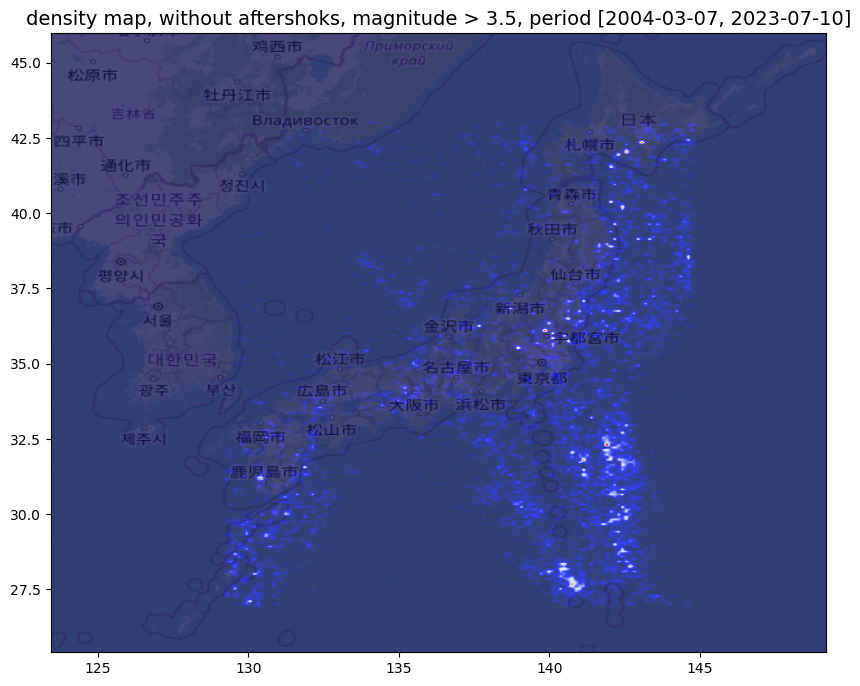

In [23]:
start_dt_str = str(formatted_without_aft_df["time"].min()).split(" ")[0]
end_dt_str = str(formatted_without_aft_df["time"].max()).split(" ")[0]
text = f"density map, without aftershoks, magnitude > 3.5, period [{start_dt_str}, {end_dt_str}]"

density_map, x, y = create_celled_data(
    lon=formatted_without_aft_df["lon"], lat=formatted_without_aft_df["lat"]
)

plot_density(density_map)
plt.title(text, fontsize=14);

#### density baseline 10 years

baseline
horizon_min: 10, horizon_max: 50, window_years: 10, testing_days: 1000


100%|██████████| 950/950 [00:25<00:00, 36.72it/s]


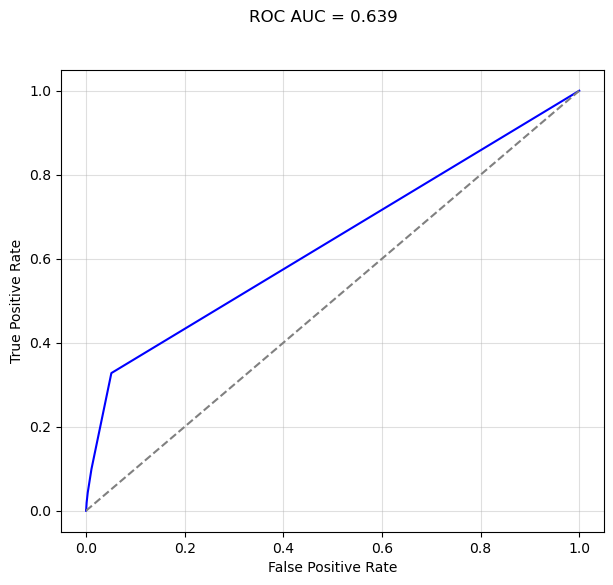

In [24]:
baseline1_without_aft_magn_3_5 = baseline(
    df=formatted_without_aft_df,
    window_years=10
)
target, prediction = baseline1_without_aft_magn_3_5.predict()
plot_roc(
    target=target.flatten(), prediction=prediction.flatten(), 
    src_label="", save_dir=None, file_name=None
);

#### density baseline 5 years

baseline
horizon_min: 10, horizon_max: 50, window_years: 5, testing_days: 1000


100%|██████████| 950/950 [00:25<00:00, 37.68it/s]


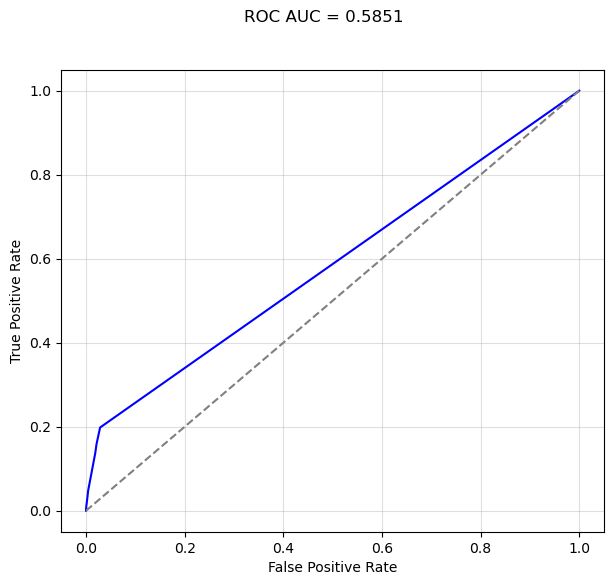

In [25]:
baseline2_without_aft_6 = baseline(
    df = formatted_without_aft_df,
    window_years=5
)
target, prediction = baseline2_without_aft_6.predict()

plot_roc(
    target=target.flatten(), prediction=prediction.flatten(), 
    src_label="", save_dir=None, file_name=None
);

### magnitude > 6

#### data

In [26]:
formatted_without_aft_df = get_formatted_dataset(without_aft_df, min_magnitude=6)
formatted_without_aft_df = formatted_without_aft_df.rename(columns={"longitude": "lon", "latitude": "lat", "magnitude": "magn"})
formatted_without_aft_df["time"] = formatted_without_aft_df["time"].apply(lambda x: x.replace("Z", ""))
formatted_without_aft_df["time"] = formatted_without_aft_df["time"].astype("datetime64[ns]")
formatted_without_aft_df = formatted_without_aft_df[["time", "lon", "lat", "magn"]]

formatted_without_aft_df.head(2)

,time,lon,lat,magn
0,2004-05-30 00:56:06,141.859,34.108,6.7
1,2004-09-05 14:07:07,136.798,33.033,7.1


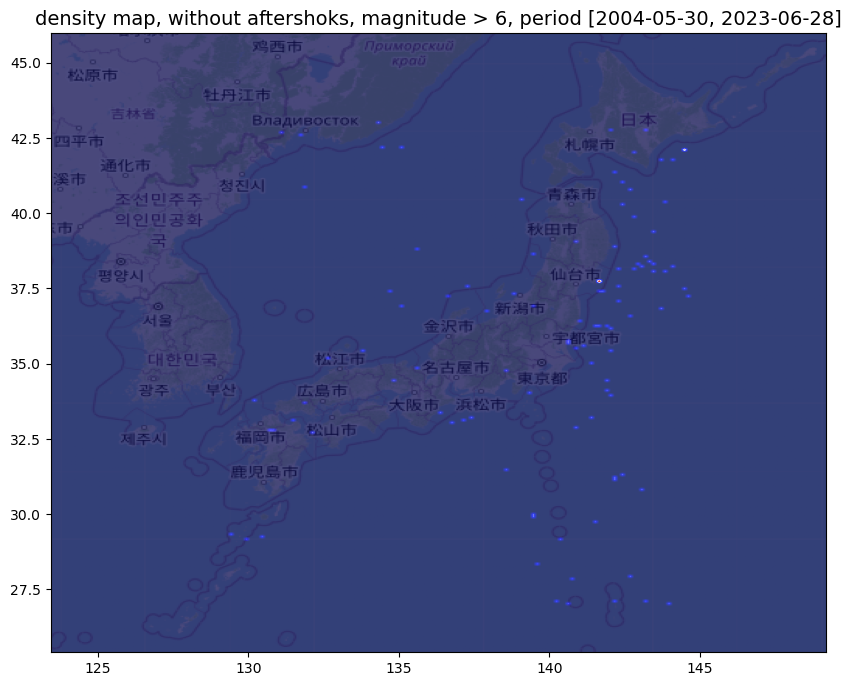

In [27]:
start_dt_str = str(formatted_without_aft_df["time"].min()).split(" ")[0]
end_dt_str = str(formatted_without_aft_df["time"].max()).split(" ")[0]
text = f"density map, without aftershoks, magnitude > 6, period [{start_dt_str}, {end_dt_str}]"

density_map, x, y = create_celled_data(
    lon=formatted_without_aft_df["lon"], lat=formatted_without_aft_df["lat"]
)

plot_density(density_map)
plt.title(text, fontsize=14);

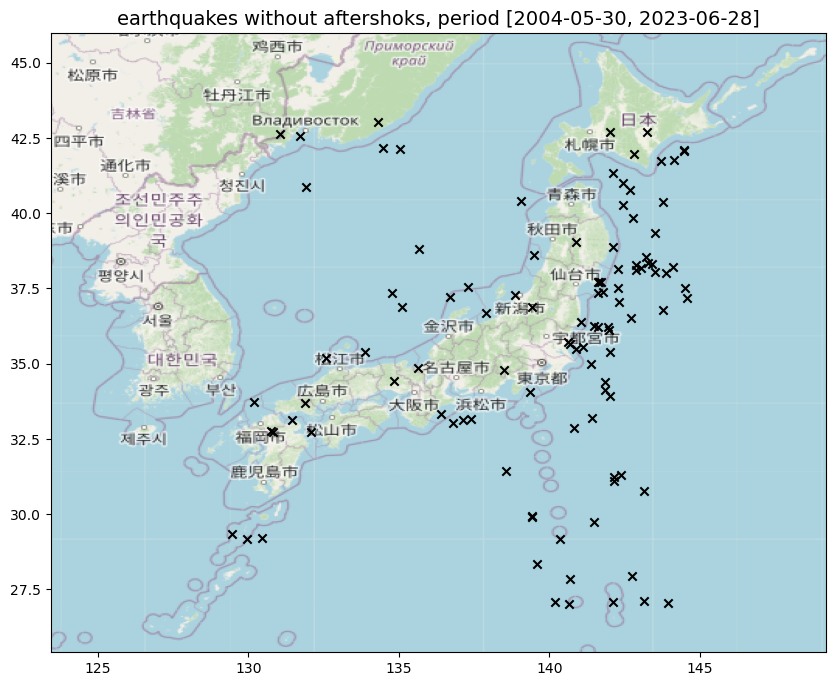

In [28]:
plot_events(x=formatted_without_aft_df["lon"], y=formatted_without_aft_df["lat"])
text = f"earthquakes without aftershoks, period [{start_dt_str}, {end_dt_str}]"
plt.title(text, fontsize=14);

#### density baseline 10 years

baseline
horizon_min: 10, horizon_max: 50, window_years: 10, testing_days: 1000


100%|██████████| 950/950 [00:25<00:00, 37.09it/s]


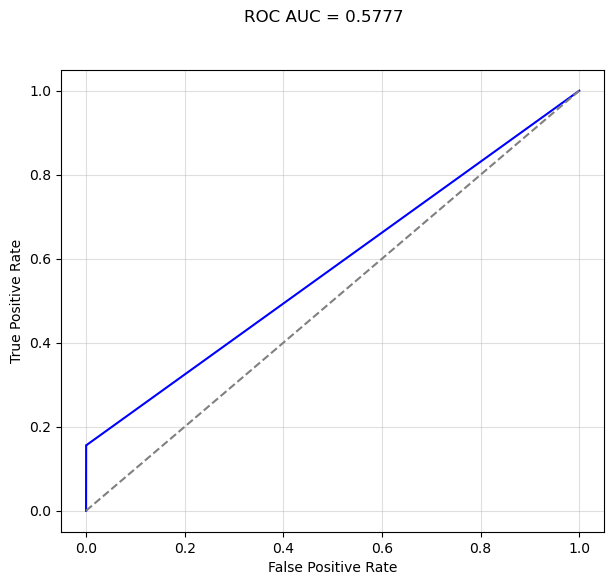

In [29]:
baseline1_without_aft_magn_6 = baseline(
    df=formatted_without_aft_df,
    window_years=10
)
target, prediction = baseline1_without_aft_magn_6.predict()
plot_roc(
    target=target.flatten(), prediction=prediction.flatten(), 
    src_label="", save_dir=None, file_name=None
);

#### density baseline 5 years

baseline
horizon_min: 10, horizon_max: 50, window_years: 5, testing_days: 1000


100%|██████████| 950/950 [00:24<00:00, 39.54it/s]


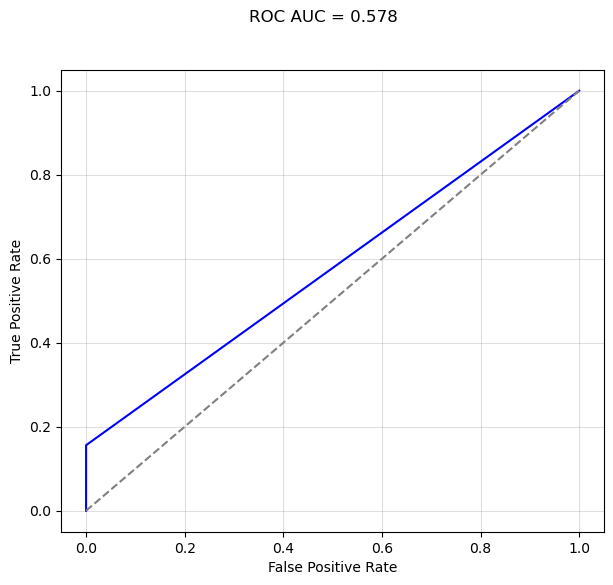

In [30]:
baseline2_without_aft_6 = baseline(
    df = formatted_without_aft_df,
    window_years=5
)
target, prediction = baseline2_without_aft_6.predict()

plot_roc(
    target=target.flatten(), prediction=prediction.flatten(), 
    src_label="", save_dir=None, file_name=None
);

In [31]:
result_df = pd.DataFrame({
    "aftershocks": ["yes", "yes", "no", "no", "yes", "yes", "no", "no",],
    "magnitude_trs": [3.5, 3.5, 3.5, 3.5, 6., 6., 6., 6.],
    "baseline (retro period)": [10, 5, 10, 5, 10, 5, 10, 5],
    "roc_auc": [0.8428, 0.7802, 0.639, 0.5851, 0.5541, 0.5547, 0.5777, 0.578],
})

result_df

,aftershocks,magnitude_trs,baseline (retro period),roc_auc
0,yes,3.5,10,0.8428
1,yes,3.5,5,0.7802
2,no,3.5,10,0.6390
3,no,3.5,5,0.5851
4,yes,6.0,10,0.5541
5,yes,6.0,5,0.5547
6,no,6.0,10,0.5777
7,no,6.0,5,0.5780
